# Tutorial 1:  ClimateBench Dataset and How Machine Learning Can Help

**Week 2, Day 5: AI and Climate Change**

**By Climatematch Academy**

__Content creators:__  Deepak Mewada, Grace Lindsay

__Content reviewers:__ Name Surname, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___

# Tutorial Objectives
*Estimated timing of tutorial: 25 minutes*

Today, we have total 6 short tutorials.  In Tutorial 1, we delve into the fundamentals, including discussions on climate model emulators and the ClimateBench dataset. We gain insights into Earth System Models (ESMs) and Shared Socioeconomic Pathways (SSPs), alongside practical visualization techniques for ClimateBench features. Tutorial 2 expands on these foundations, exploring decision trees, hyperparameters, and random forest models. We learn to evaluate regression models, focusing on the coefficient of determination (R^2), and gain hands-on experience implementing models using scikit-learn. Tutorial 3 shifts focus to mitigating overfitting in machine learning models. Here, we learn the importance of model generalization and acquire practical skills for splitting data into training and test sets. In Tutorial 4, we refine our understanding of model robustness, with emphasis on within-distribution generalization and testing model performance on similar data. Tutorial 5 challenges us to test our models on various types of out-of-distribution data, while also exploring the role of climate model emulators in climate science research. Finally, Tutorial 6 concludes the series by discussing practical applications of AI and machine learning in addressing climate change-related challenges, and introducing available resources and tools in the field of climate change AI.

In this tutorial 1, we will...
* Learn about the basics of data science and machine learning
* Define “climate model emulators”
* Introduce the ClimateBench dataset
* Visualize features from this dataset



In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today


## Uncomment the code below to test your function

#from IPython.display import IFrame
#link_id = "<YOUR_LINK_ID_HERE>"

print("If you want to download the slides: 'Link to the slides'")
      # Example: https://osf.io/download/{link_id}/

#IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)



---
# **Setup**

In [ ]:
# @title Import necessary libraries:

import matplotlib.pyplot as plt    # For plotting graphs
import pandas as pd                 # For data manipulation
import seaborn as sns               # For advanced visualizations

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a `ModuleNotFoundError: No module named 'library name` error , please run `pip install 'library name` to install the required module.

In [ ]:
# @title Helper functions { display-mode: "form" }

# If any helper functions you want to hide for clarity (that has been seen before
# or is simple/uniformative), add here
# If helper code depends on libraries that aren't used elsewhere,
# import those libaries here, rather than in the main import cell

import tempfile
import os
import pooch
def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D5_ClimateResponse-AdaptationImpact"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [ ]:
# @title Set random seed { display-mode: "form" }

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# E.g., for DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  print(f'Random seed {seed} has been set.')


set_seed(seed=2024)  # change 2023 with any number you like
# Set a global seed value for reproducibility
random_state = 42

---
# **Section 1: ClimateBench Dataset and How Machine Learning Can Help**
---
Section Objective:
* Understand how machine learning can be helpful generally
* Understand the climate model data we will be working with
* Understand the concept of a climate model emulator
* Learn how to explore the dataset






In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
## Section 1.1:  About the ClimateBench dataset




The ClimateBench dataset offers a comprehensive collection of hypothetical climate data derived from sophisticated computer simulations (specifically, the NorESM2 model, available via CIMP6). It includes information on key climate variables such as temperature, precipitation, and diurnal temperature range. These values are collected by running simulations that represent the different Shared Socioeconomic Pathways (SSPs). Each pathway is associated with a different projected emissions profile over time. This data thus provides insights into how these climate variables may change in the future due to different emission scenarios. By utilizing this dataset, researchers can develop predictive models to better understand and anticipate the impacts of climate change, ultimately aiding in the development of effective mitigation strategies. Specifically, this data set is well-formatted for training *machine learning models*, which is exactly what you will do here.

A brief overview of the ClimateBench dataset is provided below; for additional details, please refer to the full paper -

[ClimateBench v1.0: A Benchmark for Data-Driven Climate Projections](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)   

---

### Spatial Resolution:
The simulations are conducted on a grid with a spatial resolution of approximately 2°, allowing for analysis of regional climate patterns and phenomena.

---
### Variables:
The dataset includes four main variables defined for each point on the grid:
1. <font color='#1f77b4'>**Temperature (TAS)**</font>: Represents the annual mean surface air temperature.
2. <font color='#ff7f0e'>**Diurnal Temperature Range (DTR)**</font>: Reflects the difference between the maximum and minimum temperatures within a day averaged annually.
3. <font color='#2ca02c'>**Precipitation (PR)**</font>: Indicates the annual total precipitation.
4. <font color='#d62728'>**90th Percentile of Precipitation (PR90)**</font>: Captures extreme precipitation events by identifying the 90th percentile of daily precipitation values.   
  

---
### ScenarioMIP Simulations:
The dataset incorporates ScenarioMIP simulations, exploring various future emission pathways under different socio-economic scenarios. Each scenario is defined by a set of annual emissions values over future years. We will look at 5 different scenarios in total here.


---
### Emissions Inputs:
Emissions scenarios are defined according to the following four types of emissions:
- <font color='#9467bd'>Carbon dioxide (CO<sub>2</sub>)</font> concentrations.
- <font color='#8c564b'>Methane (CH<sub>4</sub>)</font> concentrations.
- <font color='#e377c2'>Sulfur dioxide (SO<sub>2</sub>)</font> emissions, a precursor to sulfate aerosols.
- <font color='#7f7f7f'>Black carbon (BC)</font> emissions.

Note: In the ClimateBench dataset, sulfur dioxide and black carbon emissions are provided as a spatial map over grid locations, but we will just look at global totals here.

---

### Model Specifications:
- Simulation Model: the NorESM2 model is run in its low atmosphere-medium ocean resolution (LM) configuration.
- Model Components: Fully coupled earth system including the atmosphere, land, ocean, ice, and biogeochemistry components.
- Ensemble Averaging: Target variables are averaged over three ensemble members to mitigate internal variability contributions.

---

By leveraging the ClimateBench dataset, researchers gain insights into climate dynamics, enabling the development and evaluation of predictive models crucial for understanding and addressing climate change challenges.


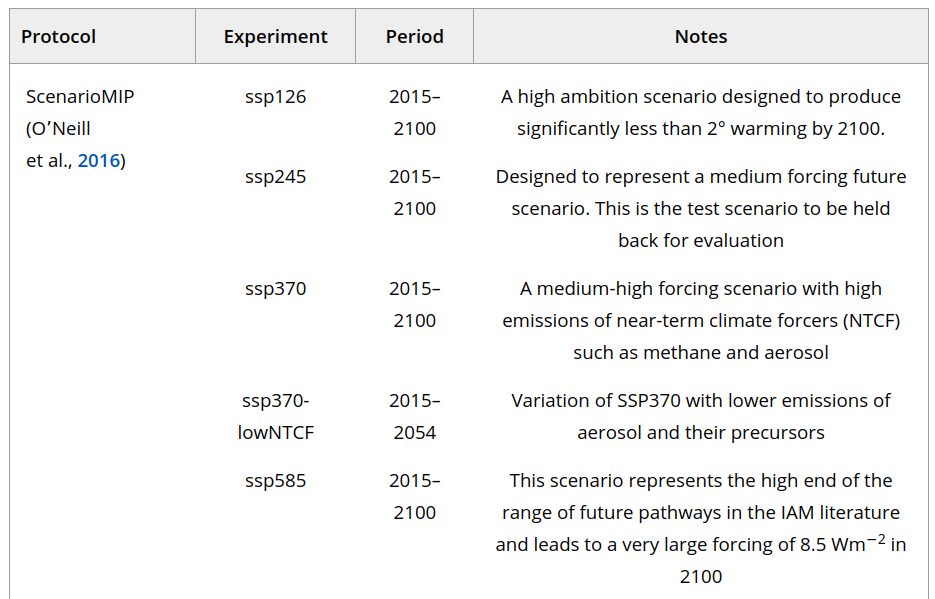

For simplicity's sake, we'll utilize a **condensed version of the ClimateBench dataset**. As mentioned above, we will be looking at only 5 scenarios ('SSPs', listed above as "experiments") and all emissions will be given as global annual averages for the years 2015 to 2050. Furthermore, we will include climate variables for each spatial location (as defined by lattitude and longitude for a restriced region) for the year 2015. The target for our model prediction will be temperature in the year 2050 for each spatial location.

## Section 1.2: Load the Dataset (Condensed Version)

We will use pandas to interface with the data, which is shared in the .csv format. First, let’s load the environmental data into a pandas dataframe and print its contents.

In [ ]:
#Load Dataset
url_Climatebench_train_val = "https://osf.io/y2pq7/download"
training_data = pd.read_csv(url_Climatebench_train_val)

## Section 1.3: Explore Data Structure

Next, we will quickly explore the size of the data, check for missing data, and understand column names

In [ ]:
print(training_data.shape)

This tells us we have 3240 rows and 152 columns.

Let's look at what these rows and columns mean:

In [ ]:
training_data

Each row represents a combination of spatial location and scenario. The scenario can be found in the 'scenario' column while location is given in the 'lat' and 'lon' columns. Climate variables for 2015 are given in the following columns and tas_FINAL represents the temperature in 2050. After these columns, we get the annual global emissions values for each of the 4 emissions types included in ClimateBench, starting in 2015 and ending in 2050.

Handle Missing Values (if necessary):

We cannot train a machine learning model if there are values missing anywhere in this dataset. Thererfore, we will check for missing values using training_data.isnull().sum(), which sums the number of 'null' or missing values.
If missing values exist, we can consider imputation techniques (e.g., fillna, interpolation) based on the nature of the data and the specific column.

In [ ]:
training_data.isnull().sum()

Here, there are no missing values as the sum of all `isnull()` values is zero for all columns. So we are good to go!

## Section 1.4 Visualize the data
In this section, we'll utilize visualization techniques to explore the dataset, uncovering underlying patterns and distributions of the variables. Visualizations are instrumental in making informed decisions and conducting comprehensive data analysis.

**Spatial Distribution of Temperature and Precipitation:**  
Plotting the spatial distribution of temperature can reveal geographical patterns and hotspots. We will use the temperature at 2015, the starting point of our simulation.

In [ ]:
# Plot spatial distribution of temperature

# Specify the column name for temperature data
col_name = 'tas_2015'

# Set the size of the figure (plot)
plt.figure(figsize=(10, 6))

# Scatter plot of latitude and longitude with temperature data as color
# 'lon' and 'lat' are columns from the dataset representing longitude and latitude respectively
# 'c' parameter specifies the color based on the temperature data
# 'cmap' parameter specifies the colormap to use for mapping temperature values to colors
# 'alpha' parameter sets the transparency level of the data points
plt.scatter(training_data['lon'], training_data['lat'], c=training_data[col_name], cmap='coolwarm', alpha=0.6)

# Add colorbar to show temperature legend
plt.colorbar(label='Temperature (T)')

# Add title to the plot
plt.title('Spatial Distribution of Temperature (2015)')

# Label x-axis as Longitude
plt.xlabel('Longitude')

# Label y-axis as Latitude
plt.ylabel('Latitude')

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()


We can see there are clear variations in 2015 temperatures over space. Note the range of latitude and longitude values. This dataset does not cover the entire globe. In fact, it covers roughly the geographical region represented below:

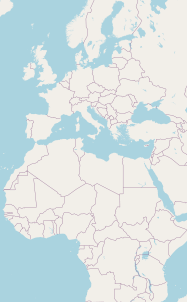

Now use the same plotting code to make a plot of the spatial distribution of total precipitation: [exercise]

### Coding Exercise 1.4:  Plotting Spatial Distribution of Total Precipitation

In this exercise, you will complete the code to plot the spatial distribution of total precipitation. Use the provided plotting code as a template and replace the ellipses with appropriate values.

Note: Note that you have the necessary libraries already imported (matplotlib.pyplot and pandas)

In [ ]:
def plot_spatial_distribution(data):
    """Plot spatial distribution of total precipitation.

    Args:
        data (DataFrame): DataFrame containing latitude, longitude, and precipitation data.

    Returns:
        None
    """
    #################################################
    ## TODO for students: details of what they should do ##
    # Complete the code to plot the spatial distribution of total precipitation.
    # Use the provided plotting code as template and replace the ellipses with appropriate values.
    raise NotImplementedError("Student exercise: Implement the function according to instructions")
    #################################################

    plt.figure(figsize=(10, 6))

    # Fill with the name of appropriate column name to plot the spatial distribution of total precipitation
    col_name = ...

    # fill in inputs to functions
    plt.scatter(..., ..., c=data[col_name], cmap='coolwarm', alpha=0.6)

    plt.colorbar(label='Precipitation')
    plt.title('Spatial Distribution of Precipitation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Uncomment the code below to test your function

#plot_spatial_distribution(training_data)

In [ ]:
# to_remove solution

def plot_spatial_distribution(data):
    """Plot spatial distribution of total precipitation.

    Args:
        data (DataFrame): DataFrame containing latitude, longitude, and precipitation data.
        col_name (str): Name of the column containing precipitation data.

    Returns:
        None
    """

    plt.figure(figsize=(10, 6))

    # Fill with the name of appropriate column name to plot the spatial distribution of total precipitation
    col_name = 'pr_2015'

    # fill in inputs to functions
    plt.scatter(data['lon'], data['lat'], c=data[col_name], cmap='coolwarm', alpha=0.6)

    plt.colorbar(label='Precipitation')
    plt.title('Spatial Distribution of Precipitation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Uncomment the code below to test your function

plot_spatial_distribution(training_data)

**Time Series Plot of Emissions Scenarios:**


We'll plot the time series of each of the four emissions scenarios in this dataset (we will get to the fifth one later). Each row in the dataset with the same 'scenario' label has the same emissions values over time. So we will just use the data from the first spatial location for each scenario.

In [ ]:
# @title Run this cell to plot the Time Series Plot of Emissions Scenarios: { run: "auto", display-mode: "form" }
#Don't worry about understanding this code! It's to setup the plot.

# Set Seaborn style
sns.set_style("whitegrid")

# Extract emissions data for each scenario
CO2_data = training_data.filter(regex='CO2_\d+')
SO2_data = training_data.filter(regex='SO2_\d+')
CH4_data = training_data.filter(regex='CH4_\d+')
BC_data = training_data.filter(regex='BC_\d+')

# Define the four scenarios
scenarios = ['ssp585',  'ssp370-lowNTCF','ssp126', 'ssp370',]

# Create subplots for each emission gas
fig, axs = plt.subplots(4, 1, figsize=(8, 15), sharex=True)

# Plot emissions data for each emission gas with enhanced styling
for i, (data, emission) in enumerate(zip([CO2_data,  CH4_data, SO2_data,BC_data], ['CO2',  'CH4', 'SO2','BC'])):
    # Plot each scenario for the current emission gas
    for scenario in scenarios:
        scenario_data = data[training_data['scenario'] == scenario]
        axs[i].plot(range(2015, 2051), scenario_data.mean(axis=0), label=scenario)

    # Set ylabel and title for the current emission gas
    axs[i].set_ylabel(f'{emission} Emissions', fontsize=12)
    axs[i].set_title(f'{emission} Emissions', fontsize=14)
    axs[i].legend()

# Set common xlabel
plt.xlabel('Year', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show legends
plt.legend()

# Remove spines from all subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.grid(True, linestyle='--')
plt.show()




---


# **Summary**



In this tutorial, we acquaint ourselves with the ClimateBench dataset and explore how machine learning contributes to climate analysis. We define the versatility of machine learning and its role in predicting climate variables. By delving into the ClimateBench dataset, we highlight its accessibility in providing climate model data. We emphasize the importance of data visualization and engage in practical exercises to explore the dataset.

---






---


                                Congratulations! You have reached the end of the  tutorial.   



---
